# Investigating Bernard and an Ellipsoid at full size, full res

In [1]:
from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')

# Load data

In [2]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'

In [3]:
proj_keys = ['B_H', 'B_V', 'E_H', 'E_V', ]

load_paths = {
    'B_H' : BASE_DRIVE_PATH + 'Bernard/1000/H_DICT_PKL/Bernard_0250_1000_H_056.pkl',
    'B_V' : BASE_DRIVE_PATH + 'Bernard/1000/V_DICT_PKL/Bernard_0250_1000_V_056.pkl',
    'E_H' : BASE_DRIVE_PATH + 'Ellipsoid/1000/H_DICT_PKL/Ellipsoid_1000_H_056.pkl',
    'E_V' : BASE_DRIVE_PATH + 'Ellipsoid/1000/V_DICT_PKL/Ellipsoid_1000_V_056.pkl',
}

# save_paths = {
#     'B_H' : BASE_DRIVE_PATH + 'Bernard/1000/H_CSV/Bernard_12_Full_M_0250_1000_H_094.csv',
#     'B_V' : BASE_DRIVE_PATH + 'Bernard/1000/V_DICT_PKL/Bernard_12_Full_M_0250_1000_V_094.csv',
#     'E_H' : BASE_DRIVE_PATH + 'Ellipsoid/1000/H_DICT_PKL/Ellipsoid_1000_H_094.csv',
#     'E_V' : BASE_DRIVE_PATH + 'Ellipsoid/1000/V_DICT_PKL/Ellipsoid_1000_V_094.csv',
# }

In [4]:
results = {
    'B_H' : None,
    'B_V' : None,
    'E_H' : None,
    'E_V' : None,
}

In [5]:
for name in proj_keys:
            conv = converter.from_pickle(load_paths[name])
            results[name] = conv.generate_output_df()

            

In [6]:
def plot_corrected_rcs(df, title=None):
    phi = df['phi']
    corrected_rcs = df['Corrected_RCS']
    
    plt.figure(figsize=(8, 6))
    plt.plot(phi, corrected_rcs, label='Corrected RCS')
    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Corrected RCS (cm^2)')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()

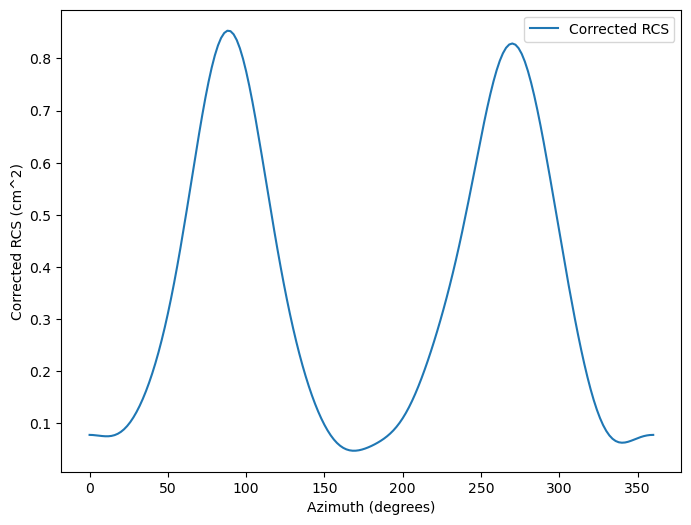

In [7]:
plot_corrected_rcs(results['B_H'])

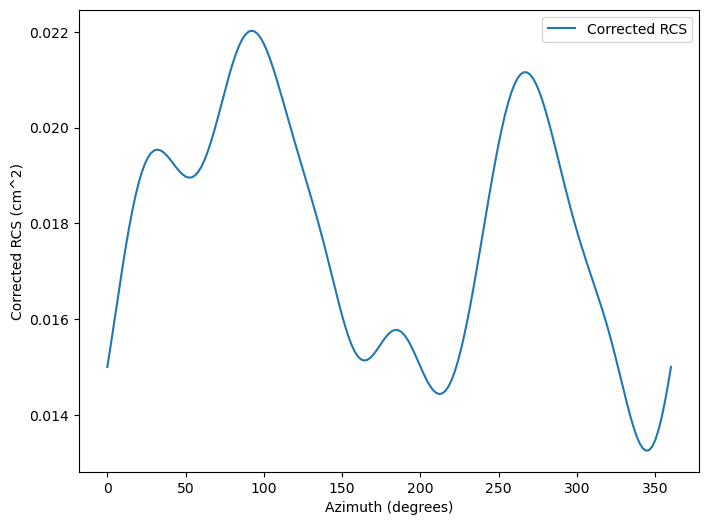

In [8]:
plot_corrected_rcs(results['B_V'])

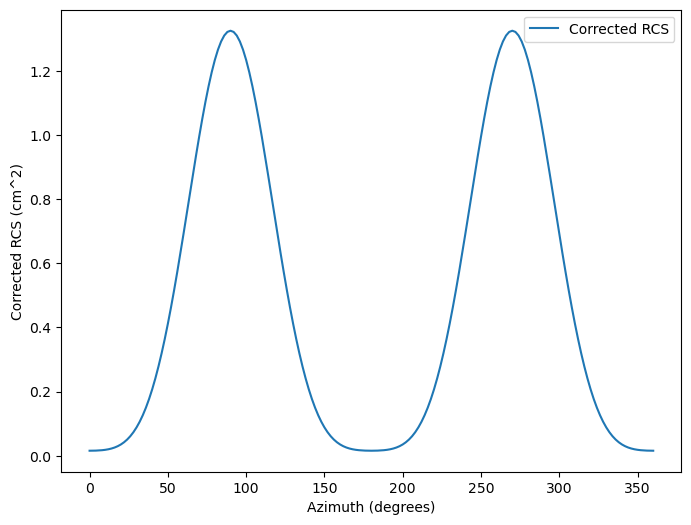

In [9]:
plot_corrected_rcs(results['E_H'])

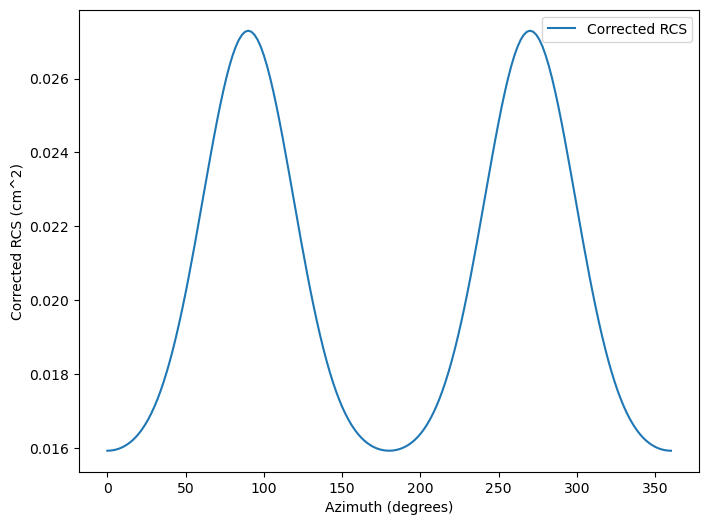

In [10]:
plot_corrected_rcs(results['E_V'])

In [11]:
Bernard_c_dp = DualPol(results['B_H'], results['B_V'], read_from_df=True)

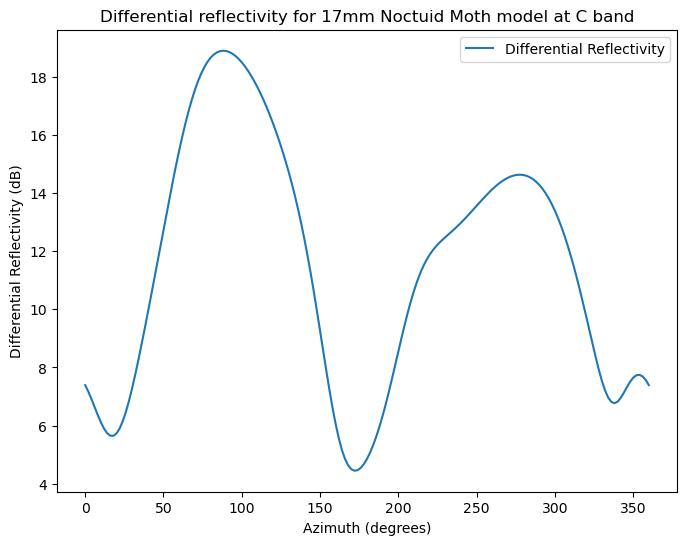

In [12]:
Bernard_c_dp.plot_differential_reflectivity(title = 'Differential reflectivity for 17mm Noctuid Moth model at C band')

In [13]:
Ellipsoid_c_dp = DualPol(results['E_H'], results['E_V'], read_from_df=True)

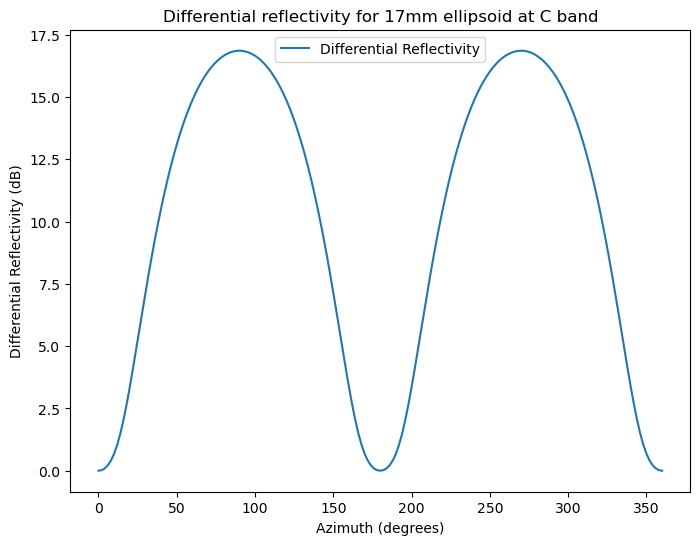

In [14]:
Ellipsoid_c_dp.plot_differential_reflectivity(title = 'Differential reflectivity for 17mm ellipsoid at C band')

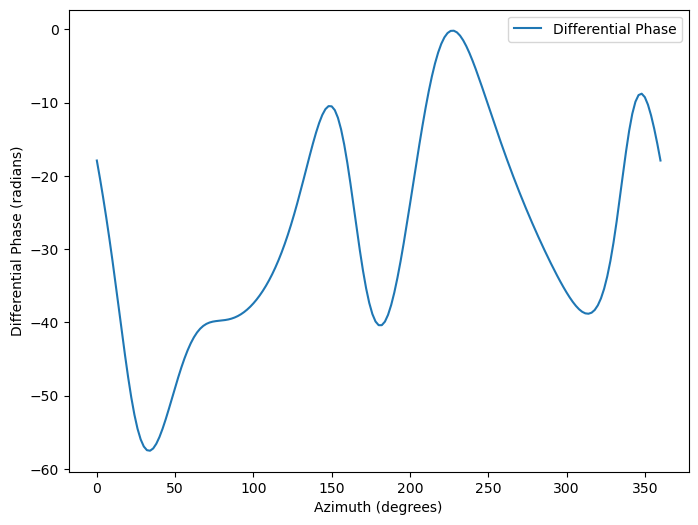

In [15]:
Bernard_c_dp.plot_differential_phase()

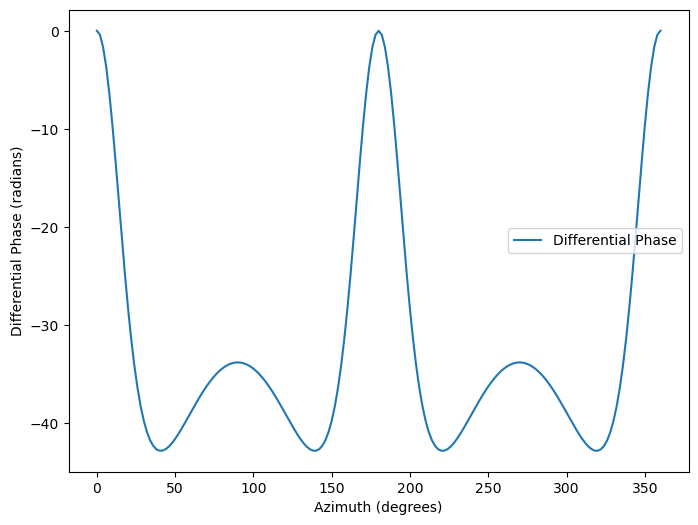

In [16]:
Ellipsoid_c_dp.plot_differential_phase()

In [17]:
Bernard_c_dp._calculate_phases()
Ellipsoid_c_dp._calculate_phases()

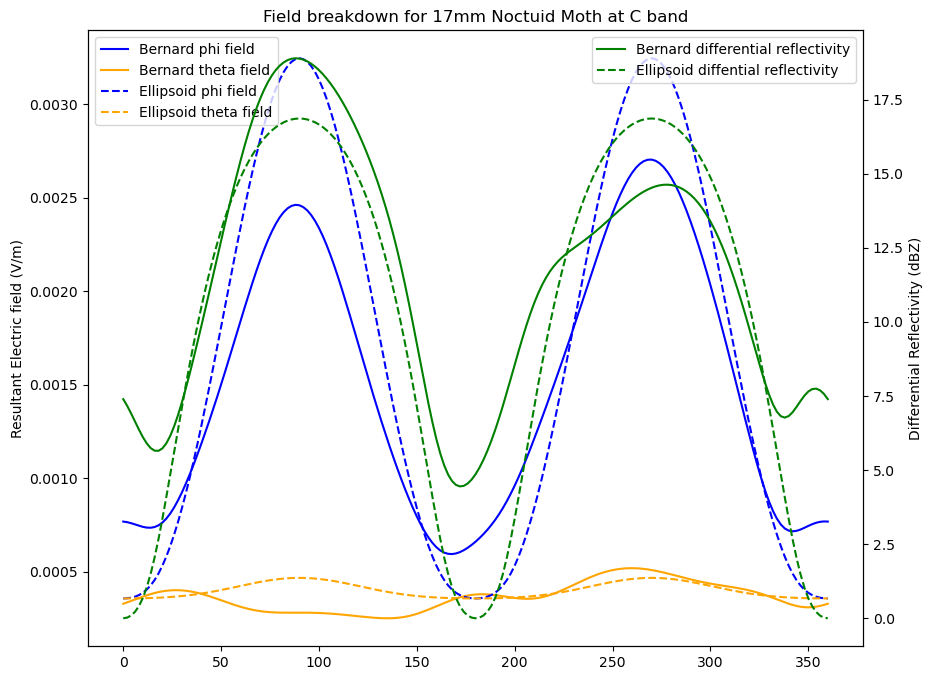

In [18]:

phi = Bernard_c_dp.horizontal_data["phi"]
plt.figure(figsize=(10, 8))
plt.plot(phi, np.absolute(Bernard_c_dp.resultant_phi_field), label="Bernard phi field", color ='blue')
plt.plot(phi, np.absolute(Bernard_c_dp.resultant_theta_field), label="Bernard theta field", color ='orange')
plt.plot(phi, np.absolute(Ellipsoid_c_dp.resultant_phi_field), label="Ellipsoid phi field", linestyle = '--', color ='blue')
plt.plot(phi, np.absolute(Ellipsoid_c_dp.resultant_theta_field), label="Ellipsoid theta field", linestyle = '--', color ='orange')
plt.ylabel("Resultant Electric field (V/m)")
plt.legend(loc='upper left')

ax2 = plt.twinx()
ax2.plot(phi, Bernard_c_dp.differential_reflectivity, label="Bernard differential reflectivity", color ='green')
ax2.plot(phi, Ellipsoid_c_dp.differential_reflectivity, label="Ellipsoid diffential reflectivity", linestyle = '--', color ='green')

plt.xlabel("Azimuth (degrees)")
plt.ylabel("Differential Reflectivity (dBZ)")
#plt.ylim(-,2.5)
plt.title('Field breakdown for 17mm Noctuid Moth at C band')

plt.legend(loc='upper right')
plt.show()

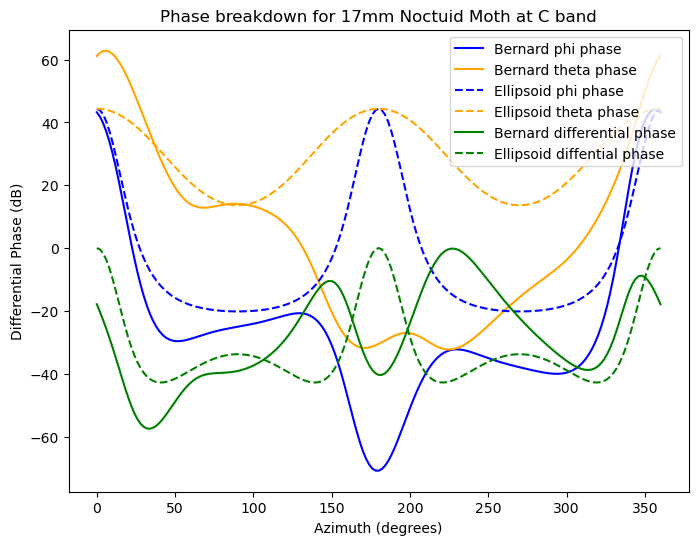

In [19]:

phi = Bernard_c_dp.horizontal_data["phi"]
plt.figure(figsize=(8, 6))
plt.plot(phi, Bernard_c_dp.resultant_phi_phase, label="Bernard phi phase", color ='blue')
plt.plot(phi, Bernard_c_dp.resultant_theta_phase, label="Bernard theta phase", color ='orange')
plt.plot(phi, Ellipsoid_c_dp.resultant_phi_phase, label="Ellipsoid phi phase", linestyle = '--', color ='blue')
plt.plot(phi, Ellipsoid_c_dp.resultant_theta_phase, label="Ellipsoid theta phase", linestyle = '--', color ='orange')
plt.plot(phi, Bernard_c_dp.differential_phase, label="Bernard differential phase", color ='green')
plt.plot(phi, Ellipsoid_c_dp.differential_phase, label="Ellipsoid diffential phase", linestyle = '--', color ='green')
plt.xlabel("Azimuth (degrees)")
plt.ylabel("Differential Phase (dB)")
#plt.ylim(-,2.5)
plt.title('Phase breakdown for 17mm Noctuid Moth at C band')

plt.legend()
plt.show()